In [22]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('NationalNames.csv')

first_8 = data.head(8)
print(f"Вивід перших 8 рядків набору даних:\n{first_8}\n") #1

Вивід перших 8 рядків набору даних:
   Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746
5   6   Margaret  1880      F   1578
6   7        Ida  1880      F   1472
7   8      Alice  1880      F   1414



In [21]:
last_8 = data.tail(8)
print(f"Вивід останніх 8 рядків набору даних:\n{last_8}\n") #2

Вивід останніх 8 рядків набору даних:
              Id     Name  Year Gender  Count
1825425  1825426       Zo  2014      M      5
1825426  1825427    Zyeir  2014      M      5
1825427  1825428     Zyel  2014      M      5
1825428  1825429   Zykeem  2014      M      5
1825429  1825430   Zymeer  2014      M      5
1825430  1825431  Zymiere  2014      M      5
1825431  1825432    Zyran  2014      M      5
1825432  1825433    Zyrin  2014      M      5



In [3]:
info_about_data = data.describe()
print(f"Загальна інформація про дані у наборі даних:\n{info_about_data}\n") #4

Загальна інформація про дані у наборі даних:
                 Id          Year         Count
count  1.825433e+06  1.825433e+06  1.825433e+06
mean   9.127170e+05  1.972620e+03  1.846879e+02
std    5.269573e+05  3.352891e+01  1.566711e+03
min    1.000000e+00  1.880000e+03  5.000000e+00
25%    4.563590e+05  1.949000e+03  7.000000e+00
50%    9.127170e+05  1.982000e+03  1.200000e+01
75%    1.369075e+06  2.001000e+03  3.200000e+01
max    1.825433e+06  2.014000e+03  9.968000e+04



In [4]:
unique_names = data['Name'].nunique()
print(f"Кількість унікальних імен: \n{unique_names}\n") #5

Кількість унікальних імен: 
93889



In [5]:
print(f"Кількість унікальних жіночих та чоловічих імен: \n{data.groupby('Gender').nunique()[['Name']]}\n") #6

Кількість унікальних жіночих та чоловічих імен: 
         Name
Gender       
F       64911
M       39199



In [6]:
names_2010 = data[(data['Year'] == 2010) & (data['Gender'] == 'M')]
top5_names = names_2010.sort_values(by = 'Count', ascending=False).head(5)
print(f'5 найпопулярніших чоловічих імен у 2010 році:\n{top5_names}\n') #7

5 найпопулярніших чоловічих імен у 2010 році:
              Id     Name  Year Gender  Count
1677392  1677393    Jacob  2010      M  22082
1677393  1677394    Ethan  2010      M  17985
1677394  1677395  Michael  2010      M  17308
1677395  1677396   Jayden  2010      M  17152
1677396  1677397  William  2010      M  17030



In [7]:
year = data[data['Year'] == 1947]
most_famous_name = year.loc[year['Count'].idxmax()]
print(f'Найпопулярніше ім`я 1947 року:\n {most_famous_name['Name']}\n') #8

Найпопулярніше ім`я 1947 року:
 Linda



In [8]:
min_count = data['Count'].min()
min_count_records = data[data['Count'] == min_count].shape[0] 
print(f"Кількість записів з мінімальним значенням Count: {min_count_records}\n") #9

Кількість записів з мінімальним значенням Count: 254615



In [9]:
unique_names_per_year = data.groupby('Year')['Name'].nunique()
print(f'кількість унікальних імен у кожному році:\n {unique_names_per_year}\n') #10

кількість унікальних імен у кожному році:
 Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010    31603
2011    31418
2012    31236
2013    30774
2014    30579
Name: Name, Length: 135, dtype: int64



In [20]:
most_unique_names = data.groupby('Year')['Name'].nunique().nlargest(1)
print(f"Рік із найбільшою кількістю унікальних імен: \n{most_unique_names.to_frame()}\n") #11

Рік із найбільшою кількістю унікальних імен: 
       Name
Year       
2008  32488



In [11]:
max_year_data = data.groupby('Year')['Name'].nunique().nlargest(1)
max_year = max_year_data.index[0]
filtred_data = data[data['Year'] == max_year]
most_popular_name = filtred_data.loc[filtred_data['Count'].idxmax()]
print(f"Найпопулярніше ім'я у {max_year} році: {most_popular_name['Name']}\n") #12

Найпопулярніше ім'я у 2008 році: Jacob



In [12]:
births_per_year_gender = data.pivot_table(values='Count', index='Year', columns='Gender', aggfunc='sum')
years_more_girls = (births_per_year_gender['F'] > births_per_year_gender['M']).sum()
print(f"Кількість років, коли дівчаток народжувалося більше, ніж хлопчиків: {years_more_girls}") #18

Кількість років, коли дівчаток народжувалося більше, ніж хлопчиків: 54


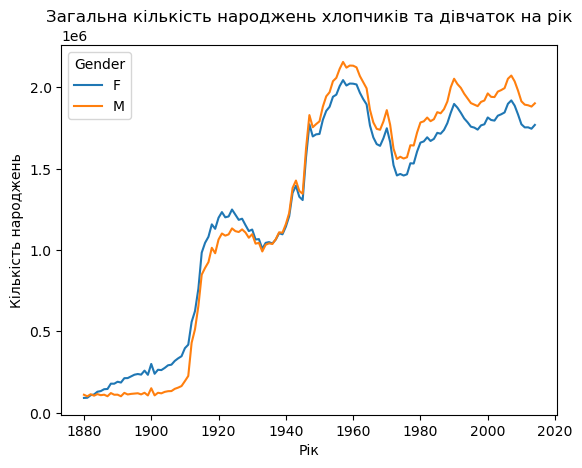

In [13]:
births_per_year_gender = data.pivot_table(values='Count', index='Year', columns='Gender', aggfunc='sum')
births_per_year_gender.plot(kind='line')
plt.title('Загальна кількість народжень хлопчиків та дівчаток на рік')
plt.xlabel('Рік')
plt.ylabel('Кількість народжень')
plt.show() #19


In [14]:
gender_neutral_names = data.groupby('Name')['Gender'].nunique()
neutral_names_count = (gender_neutral_names == 2).sum()
print(f"Кількість гендерно нейтральних імен: {neutral_names_count}") #20

Кількість гендерно нейтральних імен: 10221


In [15]:
barbara_for_boys = data[(data['Name'] == 'Barbara') & (data['Gender'] == 'M')]
barbara_boys_count = barbara_for_boys['Count'].sum()
print(f"Кількість хлопчиків, названих Barbara: {barbara_boys_count}") #21

Кількість хлопчиків, названих Barbara: 4139


In [16]:
years_observed = data['Year'].nunique()
print(f"Кількість років спостереження: {years_observed}") #22

Кількість років спостереження: 135


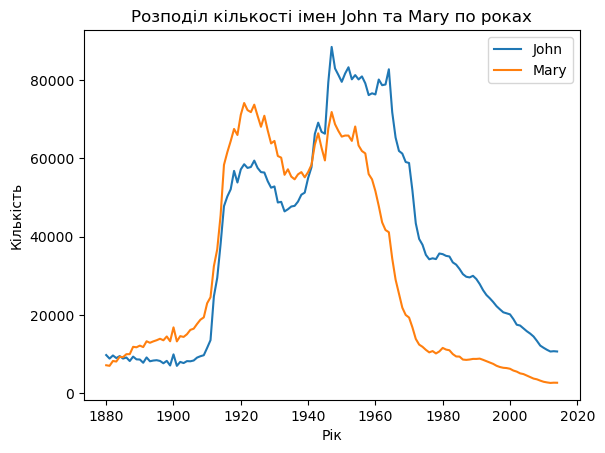

In [17]:
john_data = data[data['Name'] == 'John']
mary_data = data[data['Name'] == 'Mary']
john_by_year = john_data.groupby('Year')['Count'].sum()
mary_by_year = mary_data.groupby('Year')['Count'].sum()

plt.plot(john_by_year.index, john_by_year.values, label='John')
plt.plot(mary_by_year.index, mary_by_year.values, label='Mary')
plt.title('Розподіл кількості імен John та Mary по роках')
plt.xlabel('Рік')
plt.ylabel('Кількість')
plt.legend()
plt.show() #25

In [18]:
most_popular_names_per_year = data.loc[data.groupby('Year')['Count'].idxmax()]
print(f"Hайпопулярніші імена в кожному році: \n{most_popular_names_per_year[['Year', 'Name', 'Count']].reset_index(drop=True)}")# 27

Hайпопулярніші імена в кожному році: 
     Year      Name  Count
0    1880      John   9655
1    1881      John   8769
2    1882      John   9557
3    1883      John   8894
4    1884      John   9388
..    ...       ...    ...
130  2010  Isabella  22883
131  2011    Sophia  21816
132  2012    Sophia  22267
133  2013    Sophia  21147
134  2014      Emma  20799

[135 rows x 3 columns]
